### Read the data

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')
import pathlib
directory_path = str(pathlib.Path('__notebook__').parent.resolve())

import tabularmagic as tm

df = pd.read_csv(f'{directory_path}/house_price_data/data.csv', 
                       index_col='Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


### Initialize an Analyzer object

In [2]:
analyzer = tm.Analyzer(df, test_size=0.2, name='Housing sale price data')
analyzer

INFO: Analyzer initialized. Shapes of train, test DataFrames: (1168, 80), (292, 80). 


Housing sale price data 
----------------------------------------------------------------------------------------
Train shape: (1168, 80)                      Test shape: (292, 80)                      
----------------------------------------------------------------------------------------
Categorical variables:
  'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
  'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
  'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
  'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
  'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' 
                                                                                      

In [3]:
analyzer.load_data_checkpoint()
analyzer.scale(exclude_vars=['SalePrice'])

linear1 = analyzer.glm(
    family='poisson',
    target='SalePrice',
    predictors=['MSZoning', '1stFlrSF', 'YearBuilt', 'Street', 'Electrical'],
)

linear2 = linear1.step('backward')

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test DataFrames: 
      (1168, 80), (292, 80). 
INFO: Scaled variables 'LotFrontage', 'BsmtFinSF2', 'GrLivArea', 'YearBuilt', 
      'TotRmsAbvGrd', 'GarageYrBlt', 'MiscVal', 'OpenPorchSF', 'GarageCars', 'PoolArea', 
      'MasVnrArea', 'BsmtUnfSF', 'BsmtHalfBath', 'ScreenPorch', 'MoSold', 'MSSubClass', 
      'Fireplaces', 'FullBath', 'HalfBath', 'TotalBsmtSF', '2ndFlrSF', 'OverallQual', 
      'EnclosedPorch', '1stFlrSF', 'LowQualFinSF', 'LotArea', 'BsmtFinSF1', 
      'KitchenAbvGr', 'GarageArea', 'BsmtFullBath', 'YearRemodAdd', 'BedroomAbvGr', 
      'YrSold', 'OverallCond', '3SsnPorch', 'WoodDeckSF' using strategy standardize. 
WARN: Train data: dropped 1 rows with missing values out of a total of 1168 rows. 
WARN: Train data: dropped 1 rows with missing values out of a total of 1168 rows. 
WARN: Train data: dropped 1 rows with missing values out of a total of 1168 rows. 


ValueError: NaN, inf or invalid value detected in weights, estimation infeasible.

In [11]:
linear2.test_partialf(linear1)

AttributeError: 'LinearRegressionReport' object has no attribute 'train_report'

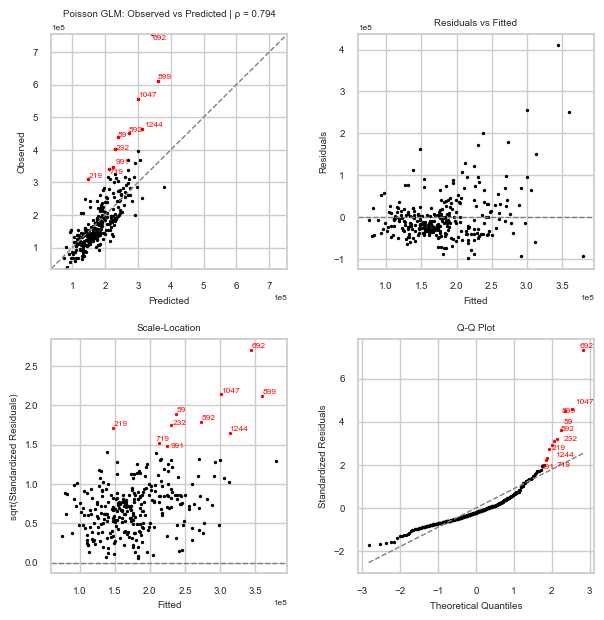

In [8]:
linear1.plot_diagnostics(show_outliers=True)

In [26]:
linear1.test_lr(linear2)

Likelihood Ratio Test 
----------------------------------------------------------------------------------------
Chi-square: 0.17735                        p-value: 9.15143e-01                          
----------------------------------------------------------------------------------------
H0: The full model does not fit the data significantly better than the reduced model 
HA: The full model fits the data signficantly better than the reduced model 
Degrees of freedom: 2.0 
Assumptions: The data must be homoscedastic and uncorrelated 

In [24]:
linear1.statsmodels_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     63.07
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          3.80e-102
Time:                        22:20:45   Log-Likelihood:                -14398.
No. Observations:                1167   AIC:                         2.882e+04
Df Residuals:                    1156   BIC:                         2.887e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.222e+05   1.91e+04      6.392      0.000    8.47e+04     1.6e+05
FV_yn(MSZoning)       4.217e+04   1.46e+04      2.883      0.004    1.35e+04    7.08e+04
RH_yn(MSZoning)       1.372e+04   1.82e+04      0.754      0.451   -2.19e+04    4.94e+04
RL_yn(MSZoning)       2.068e+04   1.26e+04      1.639      0.101   -4054.906    4.54e+04
RM_yn(MSZoning)        2.09e+04   1.28e+04      1.633      0.102   -4183.795     4.6e+04
Pave_yn(Street)         2.4e+04   1.33e+04      1.806      0.071   -2040.504       5e+04
FuseF_yn(Electrical) -3470.1896   8586.720     -0.404      0.686   -2.03e+04    1.34e+04
FuseP_yn(Electrical) -1.152e+04   4.22e+04     -0.273      0.785   -9.43e+04    7.12e+04
SBrkr_yn(Electrical)  1.515e+04   5500.212      2.755      0.006    4372.260    2.59e+04
1stFlrSF              3.798e+04   4575.353      8.302      0.000     2.9e+04     4.7e+04
YearBuilt             2.677e+04   2208.961     12.117      0.000    2.24e+04    3.11e+04
==============================================================================
Omnibus:                      402.543   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4428.096
Skew:                           1.266   Prob(JB):                         0.00
Kurtosis:                      12.201   Cond. No.                         75.0
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

In [20]:
linear2.statsmodels_summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     116.1
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.50e-83
Time:                        22:18:30   Log-Likelihood:                -14414.
No. Observations:                1168   AIC:                         2.884e+04
Df Residuals:                    1163   BIC:                         2.886e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.581e+05   1.33e+04     11.908      0.000    1.32e+05    1.84e+05
Pave_yn(Street)  2.245e+04   1.34e+04      1.675      0.094   -3821.995    4.87e+04
1stFlrSF          3.81e+04   4427.502      8.606      0.000    2.94e+04    4.68e+04
YearBuilt        2.847e+04   2116.286     13.451      0.000    2.43e+04    3.26e+04
FV_yn(MSZoning)  2.112e+04   6972.600      3.030      0.002    7458.227    3.48e+04
==============================================================================
Omnibus:                      401.811   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4417.279
Skew:                           1.262   Prob(JB):                         0.00
Kurtosis:                      12.187   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

### Exploratory data analysis

In [4]:
analyzer.eda().categorical_stats()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Statistic,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n_unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,3,4,5,6,4,4,4,6,6,6,5,2,4,4,7,5,6,3,5,5,3,3,4,4,9,6
most_common,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
least_common,C (all),Grvl,Pave,IR3,Low,NoSeWa,FR3,Sev,Blueste,RRNe,RRNn,2fmCon,2.5Fin,Shed,Metal,ImStucc,Other,BrkCmn,Fa,Po,Wood,Fa,Po,Mn,LwQ,GLQ,Floor,Po,N,FuseP,Fa,Sev,Po,2Types,Fin,Po,Ex,P,Fa,MnWw,TenC,Oth,AdjLand
n_missing,0,0,1094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,683,0,0,0,28,28,28,28,28,0,0,0,1,0,0,547,64,64,64,64,0,1162,935,1122,0,0
missing_rate,0.0,0.0,0.936644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.58476,0.0,0.0,0.0,0.023973,0.023973,0.023973,0.023973,0.023973,0.0,0.0,0.0,0.000856,0.0,0.0,0.468322,0.054795,0.054795,0.054795,0.054795,0.0,0.994863,0.800514,0.960616,0.0,0.0
n,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


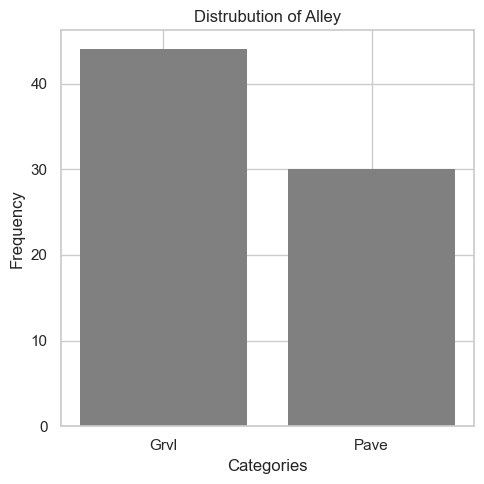

In [5]:
analyzer.eda().plot_distribution('Alley')

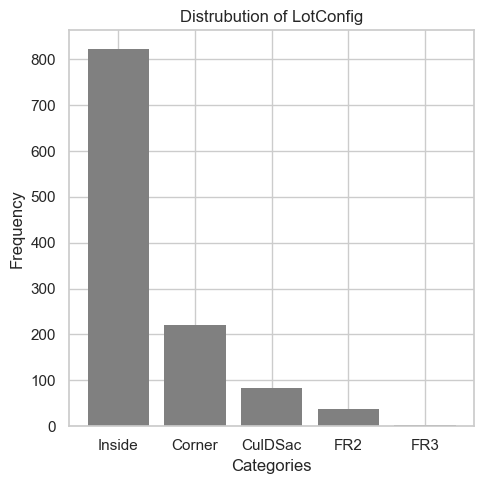

In [6]:
analyzer.eda().plot_distribution('LotConfig')

### Predict sale price

In [4]:
analyzer.impute()
mlreg_report = analyzer.regress(
    models=[
        tm.ml.LinearR(
            'ols',
            feature_selectors=[
                tm.fs.LassoFSR(max_n_features=3),
                tm.fs.KBestFSR(scorer='f_regression', k=3)
            ]
        ),
        tm.ml.LinearR('l1'), 
        tm.ml.LinearR('l2'), 
        tm.ml.TreesR(
            'adaboost',
            feature_selectors=[
                tm.fs.BorutaFSR('rf')
            ]
        )
    ],
    target='SalePrice',
    predictors=['SaleCondition', 'YrSold', 'OverallQual', 'LotArea', 'LotFrontage']
)

INFO: Imputed missing values with numeric strategy median and categorical strategy 
      most_frequent. 
INFO: Evaluating model LinearR(ols). 
PROG: Fitting LassoFSR. 
PROG: Fitting KBestFSR(f_regression). 
PROG: Fitting LinearR(ols). Search method: GridSearchCV (1 fits per fold, 5 total fits). 
INFO: Successfully evaluated model LinearR(ols). 
INFO: Evaluating model LinearR(l1). 
PROG: Fitting LinearR(l1). Search method: OptunaSearchCV (100 trials). 
INFO: Successfully evaluated model LinearR(l1). 
INFO: Evaluating model LinearR(l2). 
PROG: Fitting LinearR(l2). Search method: OptunaSearchCV (100 trials). 
INFO: Successfully evaluated model LinearR(l2). 
INFO: Evaluating model TreesR(adaboost). 
PROG: Fitting BorutaFSR. 
PROG: Fitting TreesR(adaboost). Search method: OptunaSearchCV (100 trials). 
INFO: Successfully evaluated model TreesR(adaboost). 


### View results

In [8]:
mlreg_report.metrics('train')

,LinearR(ols),LinearR(l1),LinearR(l2),TreeEnsembleR(adaboost)
Statistic,,,,
rmse,44430.156982,44224.106367,44242.930289,33488.468981
mad,30775.043841,30677.361137,30655.227085,24404.506064
pearsonr,0.817948,0.819818,0.81965,0.901569
spearmanr,0.847471,0.851376,0.850438,0.874417
r2,0.669038,0.672101,0.671822,0.811976
n_obs,1168,1168,1168,1168


In [9]:
mlreg_report.metrics('test')

,LinearR(ols),LinearR(l1),LinearR(l2),TreeEnsembleR(adaboost)
Statistic,,,,
rmse,47508.682986,47864.594103,47710.901103,42978.964149
mad,30187.007072,30562.622497,30361.070804,28109.317264
pearsonr,0.847138,0.844295,0.84583,0.879485
spearmanr,0.874703,0.868388,0.86999,0.873333
r2,0.705739,0.701314,0.703229,0.759177
n_obs,292,292,292,292


View model-specific predictors

In [10]:
mlreg_report.model('LinearR(ols)').predictors()

['Partial_yn(SaleCondition)', 'OverallQual', 'LotArea', 'LotFrontage']

In [11]:
mlreg_report.model('LinearR(ols)').fs_report().votes()

,LassoFSR,KBestFSR(f_regression)
AdjLand_yn(SaleCondition),False,False
Alloca_yn(SaleCondition),False,False
Family_yn(SaleCondition),False,False
Normal_yn(SaleCondition),False,False
Partial_yn(SaleCondition),False,True
YrSold,False,False
OverallQual,False,True
LotArea,True,False
LotFrontage,True,True


In [16]:
mlreg_report.model('LinearR(l2)').feature_importance()

,Abs Coefs
Feature,
AdjLand_yn(SaleCondition),9599.624435
Alloca_yn(SaleCondition),27829.610099
Family_yn(SaleCondition),11949.225451
Normal_yn(SaleCondition),3908.696220
Partial_yn(SaleCondition),31833.953486
YrSold,753.746012
OverallQual,40403.979871
LotArea,1.186988
LotFrontage,289.884981


In [12]:
mlreg_report.model('TreeEnsembleR(adaboost)').predictors()

['OverallQual', 'LotArea', 'LotFrontage']

In [13]:
mlreg_report.model('TreeEnsembleR(adaboost)').feature_importance()

,Importance
Feature,
OverallQual,0.805872
LotArea,0.134024
LotFrontage,0.060104


In [16]:
mlreg_report.model('TreeEnsembleR(adaboost)').fs_report().votes()

,BorutaFSR
AdjLand_yn(SaleCondition),False
Alloca_yn(SaleCondition),False
Family_yn(SaleCondition),False
Normal_yn(SaleCondition),False
Partial_yn(SaleCondition),False
YrSold,False
OverallQual,True
LotArea,True
LotFrontage,True


Obtain the savable sklearn pipeline

In [18]:
mlreg_report.model('TreeEnsembleR(adaboost)').sklearn_pipeline()

Pipeline(steps=[('custom_prep_data',
                 FunctionTransformer(check_inverse=False,
                                     func=<bound method DataEmitter.custom_transform of <tabularmagic._src.data.datahandler.DataEmitter object at 0x3066a2350>>)),
                ('feature_selector',
                 ColumnSelector(columns=['Alloca_yn(SaleCondition)',
                                         'Partial_yn(SaleCondition)',
                                         'OverallQual'])),
                ('model',
                 OptunaSearchCV(cv=KFold(n_split...
                                param_distributions={'estimator': CategoricalDistribution(choices=(DecisionTreeRegressor(max_depth=3, random_state=42), DecisionTreeRegressor(max_depth=5, random_state=42), DecisionTreeRegressor(max_depth=8, random_state=42), DecisionTreeRegressor(max_depth=12, random_state=42))),
                                                     'learning_rate': FloatDistribution(high=1.0, log=True, low=0.001, step=None),
                                                     'n_estimators': CategoricalDistribution(choices=(50, 100, 200))},
                                random_state=43))])

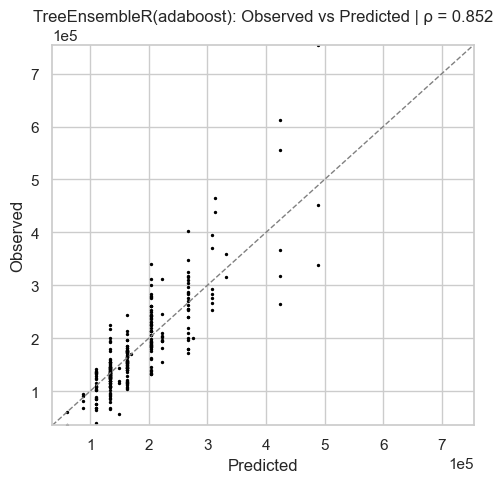

In [19]:
mlreg_report.plot_obs_vs_pred('TreeEnsembleR(adaboost)', 'test')